# Development Notebook

This notebook is intended to develop and test some code required for the **iWander** package.  Due to its nature it cannot be executed sequentially.

Some of the codes used here when mature are converted into routines in the dev/analysis.py 

In [8]:
from iwander import *

## Global definitions

In [58]:
BD="../"
%matplotlib inline

## Elements of surrogate objects

In [394]:
wobjs=pd.read_csv(BD+"wanderer.csv")
#wobjs=pd.read_csv(BD+"wanderer.csv.diagonal")
#wobjs=pd.read_csv(BD+"wanderer.csv.nodiagonal")
nominal=wobjs.iloc[0]
print(wobjs.columns)

Index(['i', 'qo', 'eo', 'inco', 'Wo', 'wo', 'Mo', 'to', 'muo', 'qasy', 'easy',
       'incasy', 'Wasy', 'wasy', 'Masy', 'tasy', 'mu', 'ting', 'xecl', 'yecl',
       'zecl', 'vxecl', 'vyecl', 'vzecl', 'xsky', 'ysky', 'zsky', 'vxsky',
       'vysky', 'vzsky', 'xgal', 'ygal', 'zgal', 'vxgal', 'vygal', 'vzgal',
       'RA', 'DEC', 'l', 'b', 'dummy'],
      dtype='object')


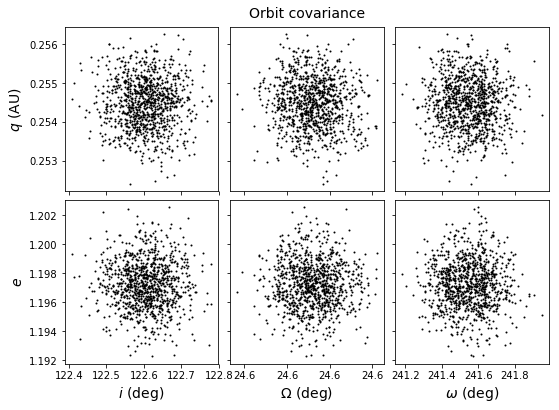

In [395]:
fig,axs=subPlots([1,1],l=0.12,b=0.2,ncols=3,dh=0.02,dw=0.02,figsize=(8,3))
args=dict(marker='o',color='k',ms=1,lw=0)
fsize=14

ax=axs[0][0]
ax.plot(wobjs.inco*RAD,wobjs.eo,**args)
ax.set_ylabel(r'$e$',fontsize=fsize)
ax.set_xlabel(r'$i$ (deg)',fontsize=fsize)

ax=axs[1][0]
ax.plot(wobjs.Wo*RAD,wobjs.eo,**args)
ax.set_xlabel(r'$\Omega$ (deg)',fontsize=fsize)
ax.set_yticklabels([])

ax=axs[2][0]
ax.plot(wobjs.wo*RAD,wobjs.eo,**args)
ax.set_xlabel(r'$\omega$ (deg)',fontsize=fsize)
ax.set_yticklabels([])

for ax in axs[0][0],axs[1][0],axs[2][0]:
    ax.tick_params(axis='both',which='major',labelsize=10)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax=axs[0][1]
ax.plot(wobjs.inco*RAD,wobjs.qo/AU,**args)
ax.set_ylabel(r'$q$ (AU)',fontsize=fsize)
ax.set_xticklabels([])

ax=axs[1][1]
ax.plot(wobjs.Wo*RAD,wobjs.qo/AU,**args)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax=axs[2][1]
ax.plot(wobjs.wo*RAD,wobjs.qo/AU,**args)
ax.set_xticklabels([])
ax.set_yticklabels([])

axs[1][1].set_title("Orbit covariance",position=(0.5,1.02),fontsize=14)

fig.savefig(FIGDIR+"wanderer-elements-diagonal.png")

## Position of the radiant

DEC =  34.147397388 0.0713627767597
RA =  280.153986922 0.196993761504
b =  16.9012410599 0.140051313863
l =  63.1642298349 0.114772359999
0.692898488252
-0.693038630723


Text(0.5,0.9,'Velocity at ingress: (U,V,W) = ($-11.320\\pm0.078$,$-22.380\\pm0.077$, $-7.618\\pm0.087$) pc')

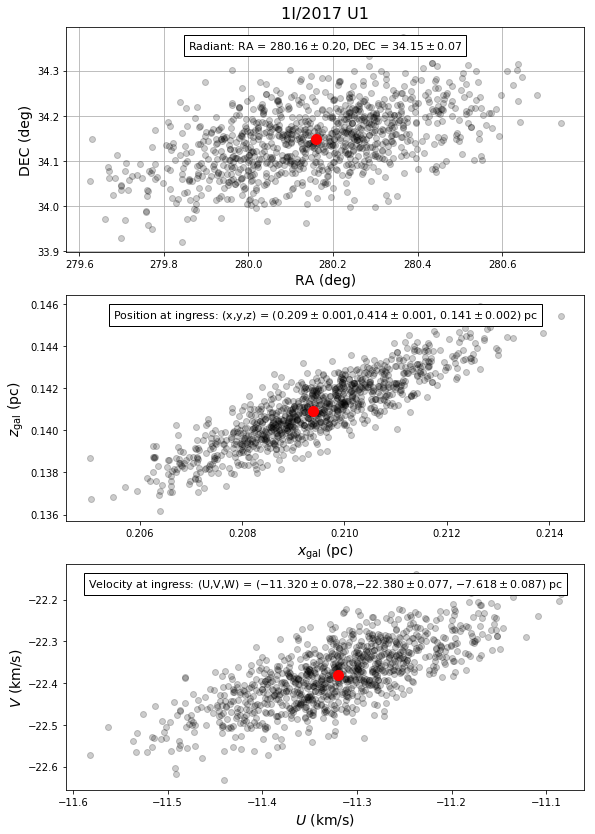

In [399]:
fig,axs=subPlots([1,1,1],dh=0.05,figsize=(9,4))

dec_error=wobjs.DEC.std()
ra_error=wobjs.RA.std()
dec_mean=wobjs.DEC.mean()
ra_mean=wobjs.RA.mean()

b_error=wobjs.b.std()
l_error=wobjs.l.std()
b_mean=wobjs.b.mean()
l_mean=wobjs.l.mean()

print("DEC = ",dec_mean,dec_error)
print("RA = ",ra_mean,ra_error)

print("b = ",b_mean,b_error)
print("l = ",l_mean,l_error)

ax=axs[0][-1]
ax.plot(wobjs.RA,wobjs.DEC,'ko',alpha=0.2)
ax.plot(wobjs.RA[0],wobjs.DEC[0],'ro',ms=10)

ax.set_xlabel("RA (deg)",fontsize=14)
ax.set_ylabel("DEC (deg)",fontsize=14)

ax.text(0.5,0.90,r"Radiant: RA = $%.2f\pm%.2f$, DEC = $%.2f\pm%.2f$"%(wobjs.RA[0],ra_error,
                                                                       wobjs.DEC[0],dec_error),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=11,ha='center')

ax.set_title('1I/2017 U1',position=(0.5,1.01),fontsize=16)
ax.grid()

ax=axs[0][-2]
xecl=wobjs.xgal/PARSEC;yecl=wobjs.ygal/PARSEC;zecl=wobjs.zgal/PARSEC;
dx=xecl.std();dy=yecl.std();dz=zecl.std();

print(dx/xecl.mean()*100)

ax.plot(xecl,zecl,'ko',alpha=0.2)
ax.plot(xecl[0],zecl[0],'ro',ms=10)
ax.set_xlabel(r'$x_{\rm gal}$ (pc)',fontsize=14)
ax.set_ylabel(r'$z_{\rm gal}$ (pc)',fontsize=14)

ax.text(0.5,0.90,r"Position at ingress: (x,y,z) = ($%.3f\pm%.3f$,$%.3f\pm%.3f$, $%.3f\pm%.3f$) pc"%(xecl[0],dx,yecl[0],dy,zecl[0],dz),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=11,ha='center')

ax=axs[0][-3]
vx=wobjs.vxgal;vy=wobjs.vygal;vz=wobjs.vzgal;
dvx=vx.std();dvy=vy.std();dvz=vz.std();

print(dvx/vx.mean()*100)

ax.plot(vx,vy,'ko',alpha=0.2)
ax.plot(vx[0],vy[0],'ro',ms=10)
ax.set_xlabel(r'$U$ (km/s)',fontsize=14)
ax.set_ylabel(r'$V$ (km/s)',fontsize=14)

ax.text(0.5,0.90,r"Velocity at ingress: (U,V,W) = ($%.3f\pm%.3f$,$%.3f\pm%.3f$, $%.3f\pm%.3f$) pc"%(vx[0],dvx,vy[0],dvy,vz[0],dvz),
        transform=ax.transAxes,bbox=dict(fc='white'),fontsize=11,ha='center')

## Development area

Since **iwander.py** library cannot be updated, while developing all global definitions and codes should be written in the following area

In [362]:
from matplotlib.ticker import FormatStrFormatter

#CONSTANTS
AU=1.496e8 #km
YEAR=365.25*86400
PARSEC=1/(1/3600.0*np.pi/180)*AU

DEG=np.pi/180
RAD=1/DEG

FIGDIR="figures/"

#ROUTINES
def figure(qax=True,**figopts):
    default=dict(qax=True)
    fig=plt.figure(**figopts)
    if qax:ax=fig.add_subplot(111)
    else:ax=None
    return fig,ax

def subPlots(panels,ncols=1,l=0.1,b=0.1,w=0.8,figsize=(8,6),dh=None,dw=None,fac=2.0):
    """
    Subplots
    """
    import numpy
    npanels=len(panels)
    spanels=sum(panels)

    # GET SIZE OF PANELS
    b=b/npanels
    if dh is None:dh=[b/2]*npanels
    elif type(dh) is not list:dh=[dh]*npanels
    else:
        dh+=[0]

    if dw is None:dw=w/5
        
    # EFFECTIVE PLOTTING REGION
    hall=(1-fac*b-sum(dh))
    hs=(hall*numpy.array(panels))/spanels
    fach=(1.0*max(panels))/spanels

    # SEE IF THERE IS MORE THAN ONE COLUMN
    wc=w/ncols if ncols>1 else w
    
    # CREATE AXES
    fig=plt.figure(figsize=(figsize[0],figsize[1]/fach))
    axs=[]
    
    bo=b
    axc=[]
    for i in range(npanels):
        ax=fig.add_axes([l,b,wc,hs[i]])
        axc+=[ax]
        b+=hs[i]+dh[i]
    axs+=[axc]
        
    b=bo
    if ncols>1:
        for j in range(ncols-1):
            b=bo
            l+=wc+dw
            axc=[]
            for i in range(npanels):
                ax=fig.add_axes([l,b,wc,hs[i]])
                axc+=[ax]
                b+=hs[i]+dh[i]
            axs+=[axc]
            
    return fig,axs

30857215014565.617
